# Import Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# methods

In [3]:
def image_normalization(arr):
    return (arr - arr.min())/(arr.max()-arr.min())

# Data read

In [4]:
train_x = np.load('/content/drive/MyDrive/CVPR-NAS-2021/data/train_x.npy')
test_x = np.load('/content/drive/MyDrive/CVPR-NAS-2021/data/test_x.npy')
val_x = np.load('/content/drive/MyDrive/CVPR-NAS-2021/data/valid_x.npy')
train_y = np.load('/content/drive/MyDrive/CVPR-NAS-2021/data/train_y.npy')
test_y = np.load('/content/drive/MyDrive/CVPR-NAS-2021/data/test_y.npy')
val_y = np.load('/content/drive/MyDrive/CVPR-NAS-2021/data/valid_y.npy')

# Image Normalization

In [5]:
train_x = image_normalization(train_x)
test_x = image_normalization(test_x)
val_x = image_normalization(val_x)

In [6]:
train_y = to_categorical(train_y, num_classes=4)
val_y = to_categorical(val_y, num_classes=4)
test_y = to_categorical(test_y, num_classes=4)

In [7]:
train_x = train_x.transpose((0, 2, 3, 1))
test_x = test_x.transpose((0, 2, 3, 1))
val_x = val_x.transpose((0, 2, 3, 1))

# Plot Random Image

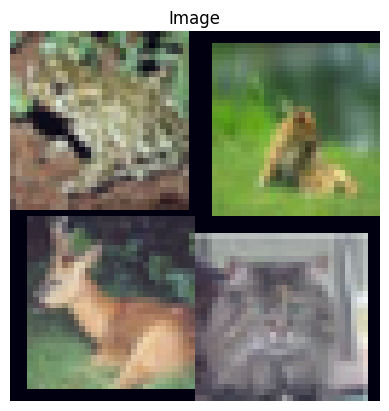

[0. 0. 1. 0.]


In [8]:
Random_Num = np.random.randint(0,(len(train_x)-1))
img = train_x[Random_Num]

plt.imshow(img)
plt.title('Image')
plt.axis('off')
plt.show()
print(train_y[Random_Num])

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
base_model = ResNet50(weights=None, include_top=False, input_shape=(64, 64, 3))

model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(4, activation='softmax'))

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
history = model.fit(train_x, train_y, batch_size=64,epochs=25,validation_data =( val_x, val_y))

Epoch 1/25
704/704 [==============================] - 119s 97ms/step - loss: 1.5287 - accuracy: 0.2616 - val_loss: 1.8801 - val_accuracy: 0.2516
Epoch 2/25
704/704 [==============================] - 58s 82ms/step - loss: 1.3454 - accuracy: 0.3526 - val_loss: 1.9941 - val_accuracy: 0.3711
Epoch 3/25
704/704 [==============================] - 58s 83ms/step - loss: 1.2902 - accuracy: 0.3808 - val_loss: 1.4326 - val_accuracy: 0.3258
Epoch 4/25
704/704 [==============================] - 58s 83ms/step - loss: 1.2599 - accuracy: 0.3933 - val_loss: 1.6677 - val_accuracy: 0.2913
Epoch 5/25
704/704 [==============================] - 59s 84ms/step - loss: 1.2284 - accuracy: 0.4078 - val_loss: 1.5478 - val_accuracy: 0.3595
Epoch 6/25
704/704 [==============================] - 58s 83ms/step - loss: 1.2150 - accuracy: 0.4212 - val_loss: 1.6192 - val_accuracy: 0.2594
Epoch 7/25
704/704 [==============================] - 59s 83ms/step - loss: 1.1833 - accuracy: 0.4404 - val_loss: 1.9248 - val_accuracy

In [13]:
model.evaluate(test_x, test_y, batch_size=200)

50/50 [==============================] - 3s 59ms/step - loss: 2.0853 - accuracy: 0.4655


[2.085254669189453, 0.46549999713897705]

In [ ]:
history = model.fit(data_gen.flow(train_x, train_y, batch_size=32), epochs=10, validation_data=(val_x, val_y))

Epoch 1/10
1407/1407 [==============================] - 169s 85ms/step - loss: 1.5573 - accuracy: 0.2566 - val_loss: 1.4830 - val_accuracy: 0.2497
Epoch 2/10
1407/1407 [==============================] - 113s 80ms/step - loss: 1.4118 - accuracy: 0.3300 - val_loss: 1.4337 - val_accuracy: 0.3293
Epoch 3/10
1407/1407 [==============================] - 110s 78ms/step - loss: 1.3605 - accuracy: 0.3483 - val_loss: 1.2979 - val_accuracy: 0.3279
Epoch 4/10
1407/1407 [==============================] - 113s 81ms/step - loss: 1.3278 - accuracy: 0.3645 - val_loss: 1.3162 - val_accuracy: 0.3551
Epoch 5/10
1407/1407 [==============================] - 114s 81ms/step - loss: 1.3066 - accuracy: 0.3697 - val_loss: 1.5373 - val_accuracy: 0.2671
Epoch 6/10
1407/1407 [==============================] - 115s 81ms/step - loss: 1.2880 - accuracy: 0.3740 - val_loss: 1.5231 - val_accuracy: 0.3362
Epoch 7/10
1407/1407 [==============================] - 108s 77ms/step - loss: 1.2694 - accuracy: 0.3810 - val_loss: 1